In [1]:
from functions import *

In [2]:
import pandas as pd
import numpy as np
import datetime as dt
import math
import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout
import pygraphviz
import matplotlib.pyplot as plt
import cvxopt as opt
from cvxopt import blas, solvers
import time
% matplotlib inline

In [3]:
price, log_ret = importdata("sp96price.csv")
dic = rolling_corr(log_ret, 250, "2017-01-31", "2015-12-30", 10)

In [4]:
ret = price/price.shift(1)

In [5]:
ret = ret.iloc[1:]

In [6]:
def min_variance_perform(pricedf, stocklist, weights, startdate, space=1):
    start = int(np.where(pricedf.index==startdate)[0])
    end = start + space
    df = pricedf.iloc[[start,end]][stocklist]
    date = sorted(df.index)[1]
    p_current = df.iloc[0]
    p_next = df.iloc[1]
    a = (p_next/p_current).values
    r = np.average(a, weights = weights)
    return (date, r)

In [7]:
def equal_perform(pricedf, stocklist, startdate, space=1):
    start = int(np.where(pricedf.index==startdate)[0])
    end = start + space
    df = pricedf.iloc[[start,end]][stocklist]
    date = sorted(df.index)[1]
    p_current = df.iloc[0]
    p_next = df.iloc[1]
    a = (p_next/p_current).values
    r = np.average(a)
    return (date, r)

In [8]:
def perform(space=1):
    colnames = ["degree_upper", "degree_lower","closeness_upper","closeness_lower","betweenness_upper","betweenness_lower"]
    colnames.extend([str(x)+'_w' for x in colnames])
    colnames.sort()
    # dates = sorted(list(dic.keys()))
    performance=pd.DataFrame(columns=colnames)
    for k in ['degree','closeness','betweenness']:
        print(k)
        for j in ['upper','lower']:
            print(j)
            
            port_dict = getportfolio(dic, k, j)
            
            cov_dict = {}
            for u,v in port_dict.items():
                ret_cov = cov_matrix(ret, v, 250, u)
                cov_dict[u] = ret_cov
            
            weights_dict = {}
            for u,c in cov_dict.items():
                w = min_variance_weights(c)
                weights_dict[u] = w
            
            col = k+"_"+j
            colw = k+"_"+j+"_w"
            for dd, p in port_dict.items():
                w = list(np.concatenate(weights_dict[dd][0]).ravel())
                d, rw = min_variance_perform(price, p, w, dd, space)
                d, r = equal_perform(price, p, dd, space)
                dat = str(d)[:10]
                performance.set_value(dat, col, r)
                performance.set_value(dat, colw, rw)
    performance = performance.sort_index()
    return performance

In [9]:
p = perform(10)

degree
upper
     pcost       dcost       gap    pres   dres
 0:  6.9409e-05 -1.0000e+00  1e+00  4e-16  5e+00
 1:  6.9406e-05 -1.0022e-02  1e-02  4e-16  5e-02
 2:  6.9062e-05 -1.2137e-04  2e-04  2e-16  1e-03
 3:  5.8371e-05 -4.1228e-06  6e-05  3e-17  3e-04
 4:  4.4638e-05  1.9628e-05  3e-05  1e-16  1e-19
 5:  4.0972e-05  3.4559e-05  6e-06  2e-16  6e-20
 6:  3.8472e-05  3.7304e-05  1e-06  2e-16  8e-20
 7:  3.7954e-05  3.7856e-05  1e-07  2e-17  7e-20
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  6.7139e-05 -1.0000e+00  1e+00  4e-16  5e+00
 1:  6.7136e-05 -1.0016e-02  1e-02  3e-16  5e-02
 2:  6.6903e-05 -1.1589e-04  2e-04  2e-16  9e-04
 3:  5.8309e-05 -2.5614e-06  6e-05  2e-16  3e-04
 4:  4.4679e-05  1.8918e-05  3e-05  2e-16  1e-19
 5:  4.1122e-05  3.4333e-05  7e-06  6e-17  8e-20
 6:  3.8534e-05  3.7405e-05  1e-06  2e-16  9e-20
 7:  3.7979e-05  3.7886e-05  9e-08  2e-16  8e-20
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0:  6.6285

In [10]:
p

,betweenness_lower,betweenness_lower_w,betweenness_upper,betweenness_upper_w,closeness_lower,closeness_lower_w,closeness_upper,closeness_upper_w,degree_lower,degree_lower_w,degree_upper,degree_upper_w
2016-01-20,0.925221,0.962787,0.912552,0.954358,0.931806,0.952402,0.918352,0.952452,0.932999,0.942468,0.914353,0.959253
2016-02-03,1.02171,1.03845,1.03849,1.06024,1.04292,1.04698,1.03039,1.06893,1.00227,1.01684,1.02942,1.05951
2016-02-18,1.01098,1.00585,1.00191,0.998233,1.00132,1.00021,1.00273,1.00798,1.01796,1.00555,0.999359,1.00539
2016-03-03,1.03877,1.01988,1.02522,1.00521,1.02768,1.01547,1.02723,1.01235,1.0355,1.03552,1.02809,1.00467
2016-03-17,1.02615,1.03914,1.02081,1.03123,1.01994,1.03395,1.01857,1.03403,1.01331,1.03703,1.02148,1.03242
2016-04-01,1.01423,1.01494,1.00892,1.0174,1.01364,1.01478,1.01067,1.01513,1.01411,1.01869,1.01487,1.01946
2016-04-15,1.00539,0.98786,1.01601,0.995989,1.00574,0.998826,1.00412,0.988948,1.00854,1.00124,1.01518,0.995262
2016-04-29,0.99827,0.993838,1.00263,0.997206,0.998273,0.995806,1.01363,0.999762,0.998048,0.997587,1.00431,0.995634
2016-05-13,0.986805,0.996829,0.989451,1.01197,0.993026,0.990807,0.991873,1.00851,0.989714,0.991131,0.984986,1.0018
2016-05-27,1.02523,1.00212,1.01905,0.99254,1.02317,0.995256,1.0301,0.994148,1.02382,1.0022,1.02352,0.991735


In [11]:
p.std(axis=0)

betweenness_lower      0.027255
betweenness_lower_w    0.018911
betweenness_upper      0.027910
betweenness_upper_w    0.019911
closeness_lower        0.025675
closeness_lower_w      0.020951
closeness_upper        0.032043
closeness_upper_w      0.022058
degree_lower           0.027524
degree_lower_w         0.023816
degree_upper           0.029639
degree_upper_w         0.019559
dtype: float64

In [12]:
def draw():
    cumreturn = p.cumprod()
    print(cumreturn.iloc[-1,:])
    # avg = avgreturn("2017-01-31", "2015-12-30", 10)
    # cumreturn["Avg_of_all_stocks"] = pd.Series(avg[1]).values
    l = [[0,1],[2,3],[4,5],[6,7],[8,9],[10,11]]
    for ll in l:
        df = cumreturn.iloc[:,ll]
        name = df.columns[0].split("_")[0]
        df.plot(figsize=(20,8), title = "Cumulative return - "+name)

betweenness_lower      1.15402
betweenness_lower_w    1.13251
betweenness_upper      1.17235
betweenness_upper_w    1.14149
closeness_lower        1.12464
closeness_lower_w      1.13096
closeness_upper        1.25257
closeness_upper_w      1.14807
degree_lower           1.12933
degree_lower_w         1.08738
degree_upper           1.19249
degree_upper_w         1.11024
Name: 2017-02-14, dtype: object


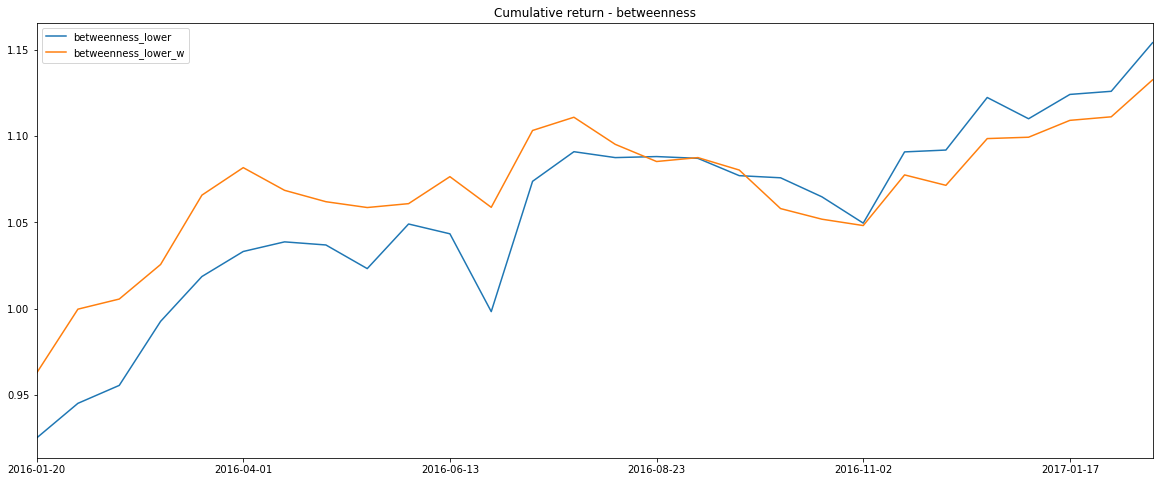

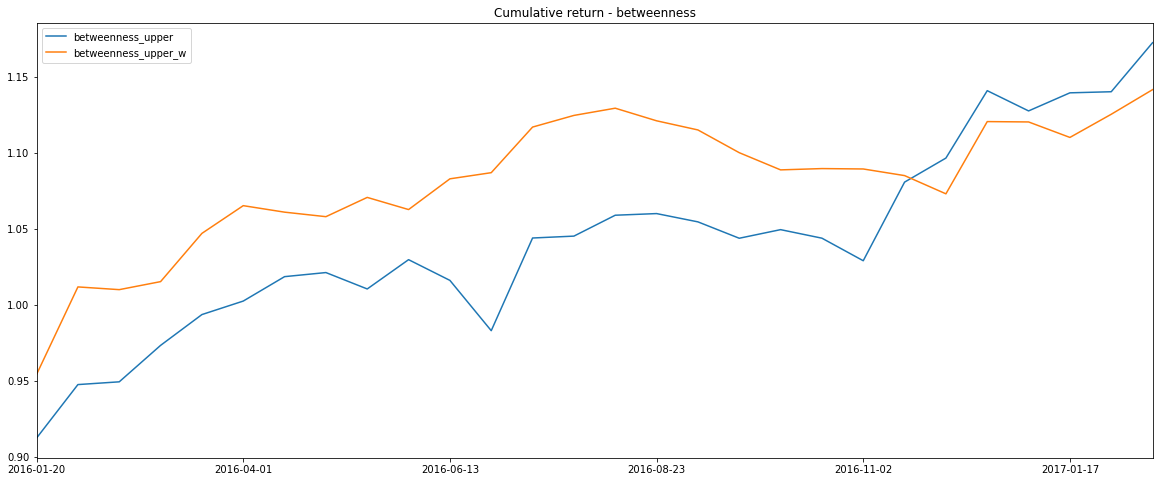

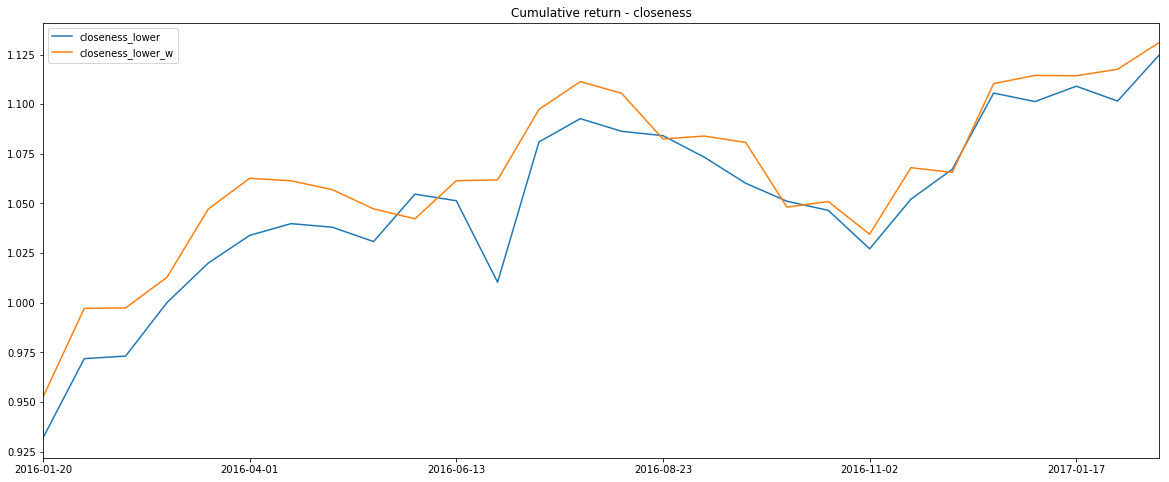

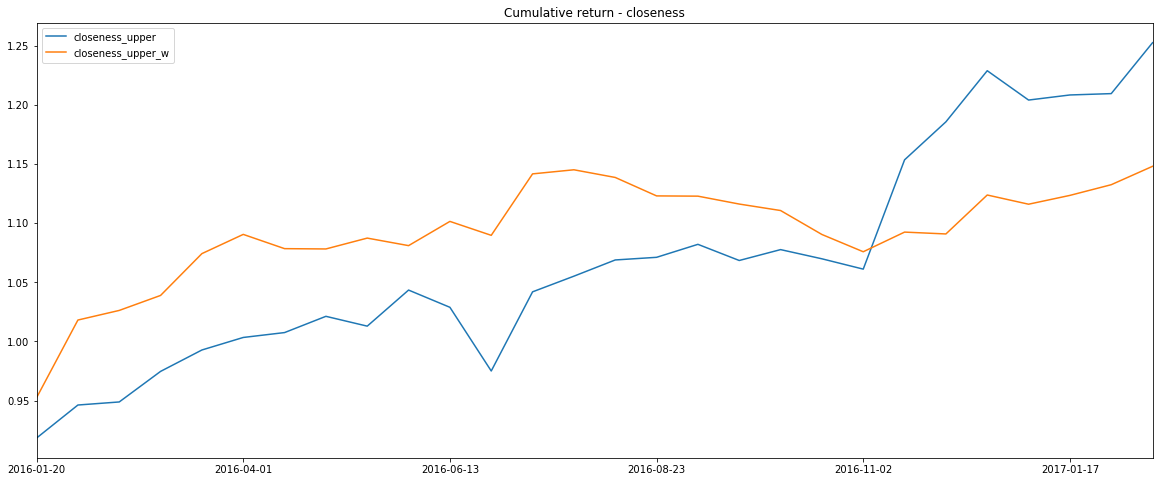

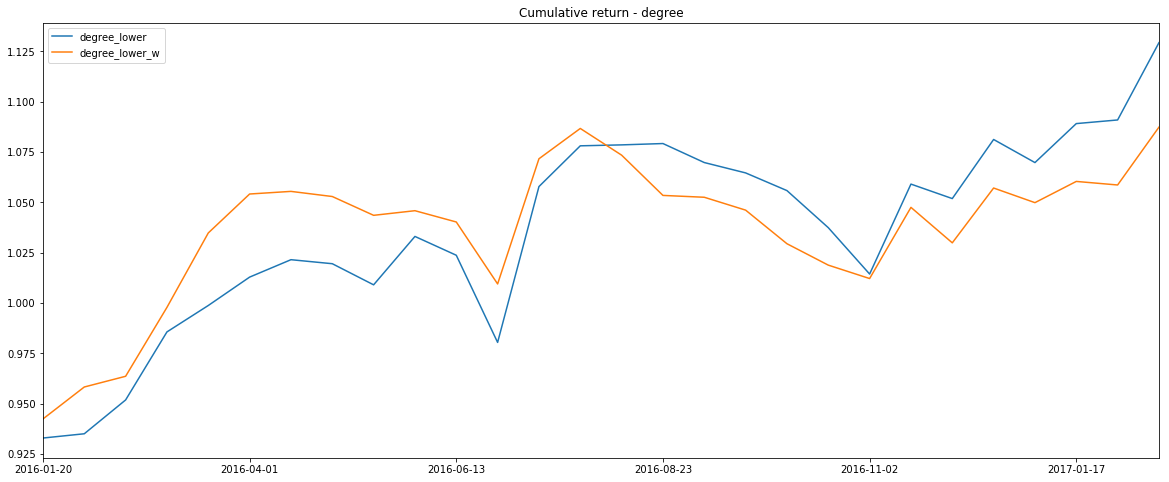

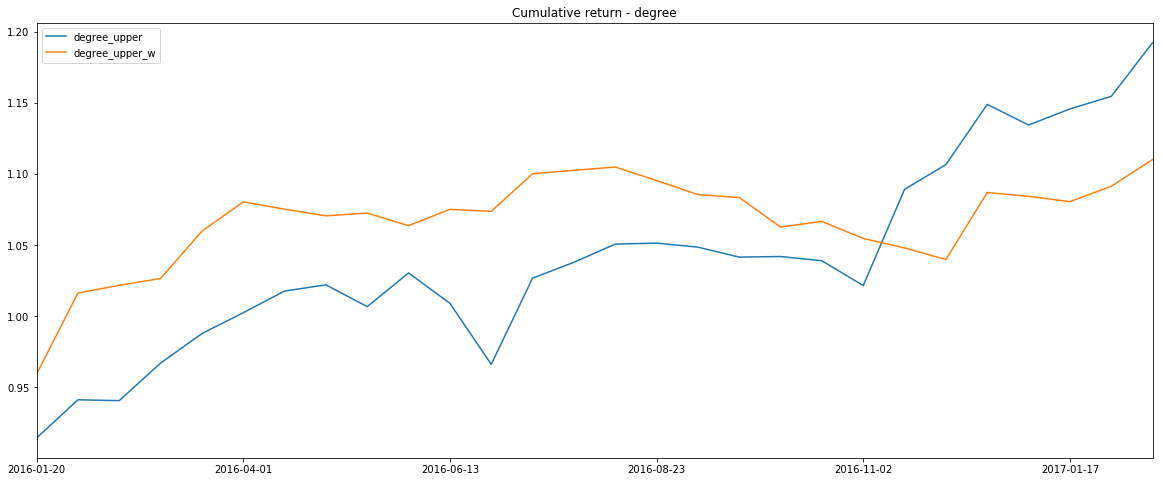

In [13]:
draw()